# Associations and dictionaries

In mathematics, we group numbers or other elements in parentheses, thus, forming a *tuple*. For example, to represent a three-dimensional Euclidean point, we'd use 3-tuple notation like `(32,9,9732)`.  Python uses the same mathematical notation:

In [1]:
p = (32,9,9732)
print type(p)
print p

<type 'tuple'>
(32, 9, 9732)


Because Python also uses parentheses for grouping subexpressions like `(1+2)*3`, there is an ambiguity in the language. Does `(5)` represent a single element tuple containing 5 or is it just the integer 5? It turns out that Python considers it an integer so we use the slightly awkward notation `(5,)` instead to mean a 1-tuple.

Tuples are ordered and so we access the elements using array indexing notation.

In [2]:
print p[0]
print p[1]
print p[2]

32
9
9732


In the computational boot camp, we saw one use of tuples in [Manipulating and Visualizing Data](data.ipynb) where the shape of the table is reported using a tuple:

```python
import pandas
prices = pandas.read_csv('data/prices.txt', header=None)
print prices.shape
```

Because tuples are ordered, we could also use list notation:

In [3]:
q = [32,9,9732]
print type(q)
print q

<type 'list'>
[32, 9, 9732]


When I first started programming in Python and encountered tuples, they seemed redundant and an unnecessary complexity. But, I've come to appreciate the distinction between tuples and lists. I tend to think of tuples as **unordered**, though, I still have to access the elements using array index notation. In other words, I view tuples as *associations* or grouping of elements. It's often the case that the elements of a single tuple have different types.

Relevant to our topic of document analysis, we'll associate a word (string) with the frequency (integer) with which it occurs in the document. For example, if the word "cat" appears 10 times, we'd create a tuple like this:

In [4]:
a = ('cat', 10)
print type(a)
print a

<type 'tuple'>
('cat', 10)


The tuple notation works even when the values are variables not literals:

In [5]:
word = 'cat'
freq = 10
a = (word, freq)
print a
print a[0]
print a[1]

('cat', 10)
cat
10


The order of the elements doesn't really matter but, since we need a way to access the elements, ordering them and using array index notation is the simplest approach. We could define `class`es to access the elements by name, such as `a.word`, but that is beyond what we can cover in this boot camp.

## Bag of words representation

A document is a sequence of words that we can represent simply as a list of strings. For example, let's split apart a simple document into words:

In [7]:
doc = 'the cat sat on the hat'
words = doc.split(' ')
print words

['the', 'cat', 'sat', 'on', 'the', 'hat']


Using a list of words preserves the order, which is sometimes important, but often it is not.  When order is not important, we can use the [bag of words](https://en.wikipedia.org/wiki/Bag-of-words_model) representation of a document that records the words and their frequencies. This not only compresses the space needed to represent the document but it also tells us something about the meaning of the document.  For example,   examining the most common words is often useful for searching and machine learning problems. One representation for bag of words is just a list of associations (order of tuples doesn't matter):

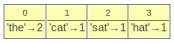

In [8]:
from lolviz import *
bag = [('the',2), ('cat',1), ('sat',1), ('hat',1)]
listviz(bag)

That representation is a faithful representation of a bag of words, but looking up word frequencies is not efficient. To find a word, we must linearly scan the list of tuples looking for the word and then plucking out the frequency.

## Dictionaries

To look up words quickly, we need to use a dictionary, which is really nothing more than a list of key-value associations. The big difference between a `list` of associations and a `dict` is their internal representation and speed of lookup. To create a dictionary from a list of associations is easy:

In [9]:
d = dict(bag)
print d

{'the': 2, 'sat': 1, 'hat': 1, 'cat': 1}


Python prints dictionaries out using `dict` literal notation, which we can use to define dictionaries directly:

{'the': 2, 'cat': 1, 'hat': 1, 'sat': 1}


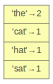

In [10]:
e = {'the': 2, 'sat': 1, 'hat': 1, 'cat': 1}
print e
dictviz(e)

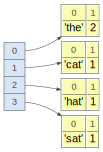

In [11]:
lolviz(e.items())  # or, at the lowest level, a list of lists

In implementation, however, dictionaries are actually more complicated than lists of associations in order to get the speed.

Accessing elements of the dictionary looks like array indexing except that the index is an arbitrary object, such as a string in our case:

In [12]:
print d['the']
print d['hat']
d['hat'] = 99    # alter the association
print d['hat']

2
1
99


Trying to access a key that does not exist in the dictionary causes a `KeyError` so it's best to check if the key exists first:

In [13]:
# print d['foo']     # This would cause a KeyError!
if 'cat' in d:       # hat is indeed in dictionary d
    print d['cat']
if 'foo' in d:       # does not exist so we don't get an error on the next line    
    print d['foo']   # does not execute

1


If you ever need a list of association representation of a dictionary, use function `items()`:

In [14]:
print d.items()

[('the', 2), ('sat', 1), ('hat', 99), ('cat', 1)]


Now that we know about associating words and word frequencies using dictionaries, we can try pulling apart a document into words in the [Intro to information extraction from text](notes/text.ipynb).